# DA Challenges 1
   * Given site user data, want 
        * 1. predict conversion rate
        * 2. come up with recommandations(product/marketing) to improve conversion rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('conversion_data.csv')

In [71]:
# preview
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [73]:
# check null/na
df[df.isnull().any(axis = 1)]
#df[df.isna().any(axis = 1)]

,country,age,new_user,source,total_pages_visited,converted


## 1. Exploratory
   * Take a look at the correlation between each column with the conversion rate 
       * Country
       * Age
       * New User
       * Source
       * Usage

### 1.1 Country

In [4]:
tmp = df.groupby('country').agg({'converted':np.sum, 'country':np.size})
tmp.assign(perc = tmp['converted']/tmp['country'], one_basis_inc = tmp['country']*0.0001)

,converted,country,perc,one_basis_inc
country,,,,
China,102,76602,0.001332,7.6602
Germany,816,13056,0.062500,1.3056
UK,2550,48450,0.052632,4.8450
US,6732,178092,0.037801,17.8092


#### Summary
* Conversion rate descends by the order of Germany, UK, US and China
* US has highest convertions and visits, followed by UK, Germany and China
* Per basis point of conversion rate increase, US brings highest conversion, followed by China, UK, Germany.
* From the statement above, we should focus on US market, and also there is huge growth oppurtunity in China

### 1.2 Age

In [35]:
tmp = df.groupby('age').agg({'converted':np.sum, 'age':np.size})

c:\users\wanyi001\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


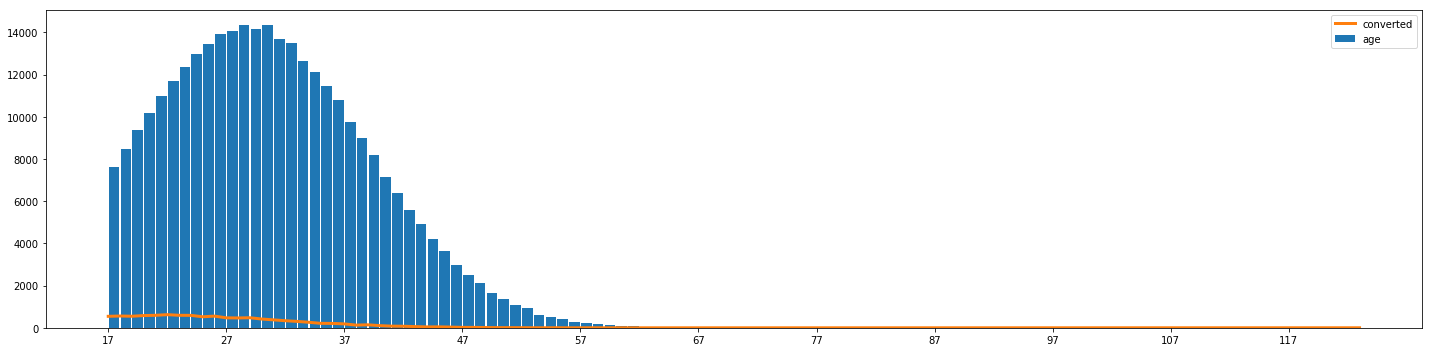

In [65]:
# plot the histgram for age
nbin = df['age'].max() -  df['age'].min()
fig, axs = plt.subplots(figsize=(20, 5), tight_layout=True)
n, bins, patch = axs.hist(df['age'], bins = nbin, rwidth=0.9)
# set ticker
_ = axs.xaxis.set_ticks(np.arange(df['age'].min(), df['age'].max(), 10))
# add convertion 
axs.plot(tmp['converted'], linewidth = 3)
axs.legend()

#### Summary
* Our biggest user group are around age 28-30  
* Convertion are at similar level from age 17 through 25, and it starts to decrease as age increases 
* Younger user tend to have higher convertion rate

### 1.3 New user

In [76]:
tmp = df.groupby('new_user').agg({'new_user':np.size, 'converted':np.sum})
tmp['prec'] = tmp['converted']/tmp['new_user']

In [77]:
tmp

,new_user,converted,prec
new_user,,,
0,99456,7161,0.072002
1,216744,3039,0.014021


#### Summary
* new users are about twice the size of return users
* return users has significant higher conversion rate than new users

### 1.4 Source

In [80]:
tmp = df.groupby('source').agg({'source':np.size, 'converted':np.sum})
tmp['prec'] = tmp['converted']/tmp['source']
tmp

,source,converted,prec
source,,,
Ads,88740,3060,0.034483
Direct,72420,2040,0.028169
Seo,155040,5100,0.032895


#### Summary
* Seo brings the most volume and has decent conversion rate
* Ads and Direct have similar volume, but Ads obvious can aim for better target, so it has highest conversion rate of all

### 1.5 Page visited

In [85]:
df['total_pages_visited'].value_counts().sort_index()

1     40739
2     43868
3     43829
4     41046
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
28        1
29        2
Name: total_pages_visited, dtype: int64